In [1]:
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import metrics

データ数：1797
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


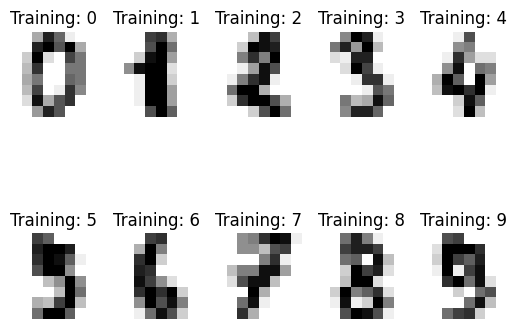

In [2]:
#データの準備
digits = datasets.load_digits() # 0~9の数字の画像データ

# データ数の確認
n_samples = len(digits.data)
print("データ数：{}".format(n_samples))

#データの可視化
print(digits.data[0])

images_and_labels = list(zip(digits.images, digits.target)) # digits.images:画像データ, digits.target:画像データのラベル

for index, (image, label) in enumerate(images_and_labels[:10]): # enumerate:リストを順番に処理
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('Training: %i'% label)
plt.show()

In [3]:
# SVM の読み込み
clf = svm.SVC(gamma=0.001, C=100.) # gamma: カーネル係数, C: 正則化パラメータ

In [4]:
# 60%のデータで学習実行
clf.fit(digits.data[:int(n_samples * 6 / 10)], digits.target[:int(n_samples * 6 / 10)])

SVC(C=100.0, gamma=0.001)

In [5]:
# 40%のデータでテスト
expected = digits.target[int(n_samples *-4 / 10):]
predicted = clf.predict(digits.data[int(n_samples *-4 / 10):])

# metrics.classification_report: 正解と予測を比較してモデルの性能をまとめた表を作成する
## precision: 適合率
## recall: 再現率
## f1-score: F1スコア
print(clf,metrics.classification_report(expected, predicted))
# metrics.confusion_matrix: 混同行列を作成する
print(metrics.confusion_matrix(expected, predicted))

SVC(C=100.0, gamma=0.001)               precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.99      0.96      0.97        73
           2       0.99      0.97      0.98        71
           3       0.97      0.86      0.91        74
           4       0.99      0.96      0.97        74
           5       0.95      0.99      0.97        71
           6       0.99      0.99      0.99        74
           7       0.96      1.00      0.98        72
           8       0.92      1.00      0.96        68
           9       0.96      0.97      0.97        71

    accuracy                           0.97       718
   macro avg       0.97      0.97      0.97       718
weighted avg       0.97      0.97      0.97       718

[[69  0  0  0  1  0  0  0  0  0]
 [ 0 70  1  0  0  0  0  0  2  0]
 [ 1  0 69  1  0  0  0  0  0  0]
 [ 0  0  0 64  0  3  0  3  4  0]
 [ 0  0  0  0 71  0  0  0  0  3]
 [ 0  0  0  0  0 70  1  0  0  0]
 [ 0  1  0  0  0 

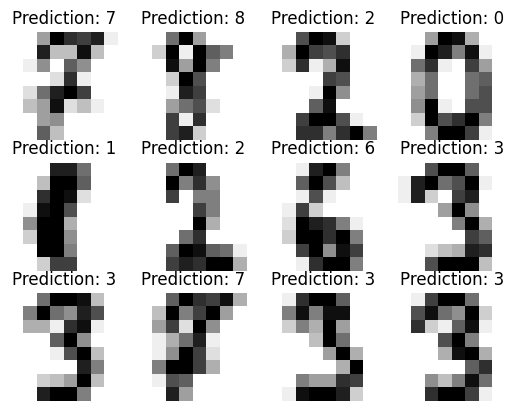

In [6]:
#予測結果を可視化
images_and_predictions = list(zip(digits.images[int(n_samples *-4 / 10):], predicted))
for index,(image, prediction) in enumerate(images_and_predictions[:12]):
 plt.subplot(3, 4, index + 1)
 plt.axis('off')
 plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
 plt.title('Prediction: %i' % prediction)
plt.show()